## Постановка задачи

В наборе данных большое количество признаков - есть возможность исследовать влияние признаков, поработать с уменьшением размерности, посмотреть зависимости между ними.

В рамках постановки задачи:
* Построить корреляционую матринцу независимых переменных, а также гистограммы распределения каждой переменной.
* Понизить размерность задачи по возможности
* Описательная статистика (статистические характеристики, графики, взаимосвязь величин, дисперсионный и факторный анализ)
* Предиктивная аналитика (линейная регрессия, логистическая регрессия)


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
%matplotlib inline

In [116]:
data = pd.read_csv("Financial Distress.csv", sep=",")
data.shape
data.head(2)

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.281,0.022934,0.87454,1.2164,0.06094,0.18827,0.52510,...,85.437,27.07,26.102,16.0,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.270,0.006454,0.82067,1.0049,-0.01408,0.18104,0.62288,...,107.090,31.31,30.194,17.0,16.0,0.4,22,0.010636,31,50


In [117]:
data.shape

(3672, 86)

In [8]:
data.columns

Index(['Company', 'Time', 'Financial Distress', 'x1', 'x2', 'x3', 'x4', 'x5',
       'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16',
       'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26',
       'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36',
       'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46',
       'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56',
       'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66',
       'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76',
       'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83'],
      dtype='object')

In [7]:
data.describe()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
count,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03,3672.000000,3672.000000,3672.000000,...,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,182.084423,7.528322,1.040257,1.387820,0.129706,0.615769,8.681599e-01,0.154949,0.106717,0.784031,...,86.839822,91.920506,89.115908,17.780855,15.198708,-2.664305,19.714597,1.100488,13.122277,33.044935
std,117.024636,4.064016,2.652227,1.452926,0.120013,0.177904,5.719519e-01,0.124904,0.210555,1.033606,...,16.706209,64.656504,64.349382,2.040152,2.828648,8.192663,7.508588,2.666733,9.465907,13.714563
min,1.000000,1.000000,-8.631700,0.075170,-0.258080,0.016135,5.350000e-07,-0.269790,-0.627750,0.035160,...,54.806000,24.318000,23.776000,15.250000,12.000000,-20.200000,1.000000,-0.499220,1.000000,2.000000
25%,80.000000,4.000000,0.172275,0.952145,0.048701,0.501888,5.525575e-01,0.070001,-0.027754,0.436003,...,79.951000,39.800000,38.377000,16.000000,13.000000,-7.000000,14.000000,0.189912,6.000000,21.000000
50%,168.000000,7.000000,0.583805,1.183600,0.107530,0.638690,7.752450e-01,0.131830,0.104325,0.641875,...,90.000000,66.120000,59.471000,17.000000,14.500000,0.200000,20.000000,0.594765,11.000000,34.000000
75%,264.250000,11.000000,1.351750,1.506475,0.188685,0.749425,1.039000e+00,0.219570,0.231230,0.896773,...,93.883000,130.500000,132.400000,20.000000,16.000000,2.100000,26.000000,1.355050,17.000000,44.000000
max,422.000000,14.000000,128.400000,51.954000,0.749410,0.967900,6.835600e+00,0.858540,0.929550,38.836000,...,120.870000,227.500000,214.500000,22.000000,22.000000,8.600000,37.000000,128.400000,49.000000,74.000000


### Пропуски в данных

In [11]:
# посмотрим пропуски в данных
for col_name in data.columns:
    if data[col_name].count() != data.shape[0]:
        print(col_name)

Пропусков в данных нет - уже хорошо

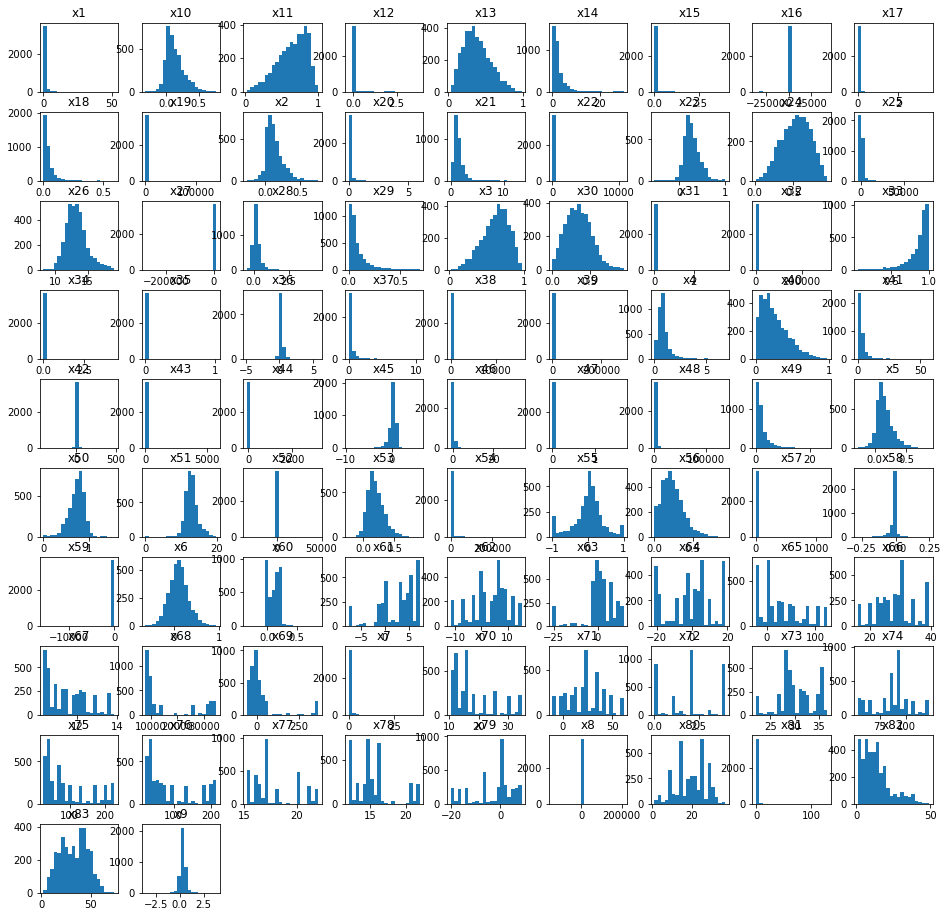

In [4]:
# Посмотрим значения - на что похожи данные
df_num_features = data
df_num_features.drop(['Company', 'Time', 'Financial Distress'], axis=1, inplace=True)
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

### Корреляции и понижение размерности

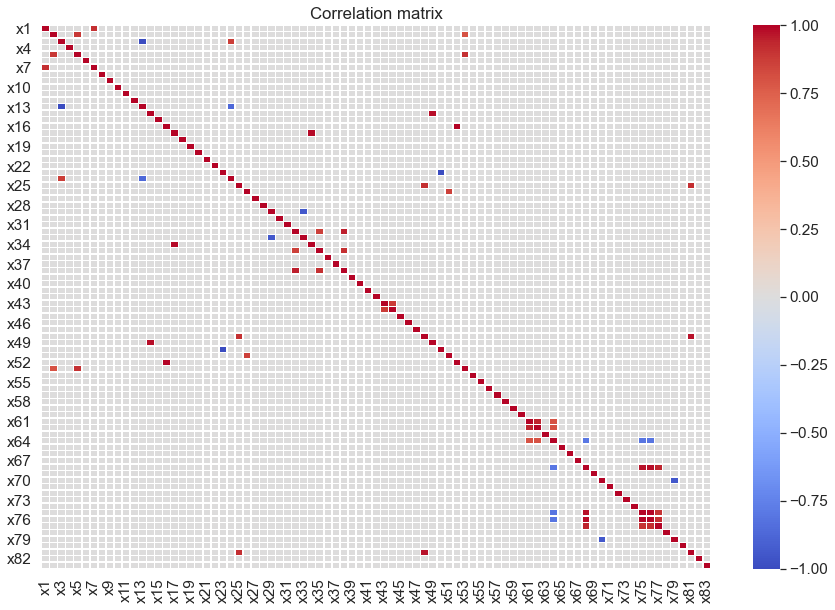

In [120]:
# Признаков много - посмотрим значительные корреляции более 0.8
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df_num_features.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.8] = 0  
# Поскольку переменных очень много смотрим только сильную зависимость

sns.heatmap(corr_matrix, annot=False, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

Около 20-и факторов имеют корреляцию более 0.8 - имеет смысл работать над снижением размерности.

Факторы имеющие значительные корреляции:

In [123]:
nums = 0 # количество факторов с корреляцией выше 0.8
for col_name in corr_matrix.columns:
    res = corr_matrix.loc[((corr_matrix[col_name] >= 0.8) | (corr_matrix[col_name] <= -0.8)) &
                          (corr_matrix[col_name] != 1) & (corr_matrix[col_name] != -1), 
                          col_name] 
    if res.shape[0] > 0:
#         print(res, nums)
        nums += 1
n_comp = corr_matrix.shape[0] - nums # количество факторов, которые оставляем в модели
print(n_comp, nums)

50 33


### Понижение размерности

In [124]:
pca = PCA(n_components = n_comp)
data_pca = pd.DataFrame(pca.fit_transform(df_num_features))

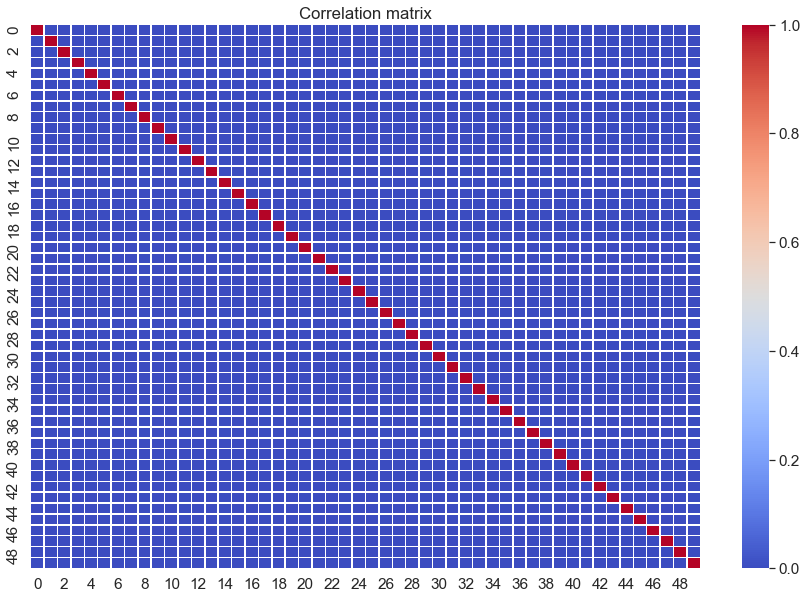

In [125]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = data_pca.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.8] = 0  
# Поскольку переменных очень много смотрим только сильную зависимость

sns.heatmap(corr_matrix, annot=False, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [126]:
nums = 0 # количество факторов с корреляцией выше 0.8
for col_name in corr_matrix.columns:
    res = corr_matrix.loc[((corr_matrix[col_name] >= 0.8) | (corr_matrix[col_name] <= -0.8)) &
                          (corr_matrix[col_name] != 1) & (corr_matrix[col_name] != -1), 
                          col_name] 
    if res.shape[0] > 0:
#         print(res, nums)
        nums += 1
n_comp = corr_matrix.shape[0] - nums # количество факторов, которые оставляем в модели
print(n_comp, nums)

50 0
